In [3]:
%matplotlib inline

# This notebook will use this variable to determine which
# remote site to run on.
import os


SITE_NAME = "oliver_wsl"
RANKS = 8

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import salvus.namespace as sn

In [5]:
def get_spherical_inclusion():
    nx, ny = 200, 200
    x = np.linspace(-0.1, +0.1, nx)
    y = np.linspace(-0.1, +0.1, nx)
    xx, yy = np.meshgrid(x, y, indexing="ij")

    # Add 3 spherical inclusions
    vp = 1500.0 * np.ones_like(xx)
    rho = 990.0 * np.ones_like(xx)
    mask = np.sqrt(xx**2 + yy**2) < 0.05
    vp[mask] = 1480.0
    rho[mask] = 975.0

    mask = np.sqrt(xx**2 + (yy - 0.025) ** 2) < 0.015
    vp[mask] = 1555.0
    rho[mask] = 1040.0

    mask = np.sqrt(xx**2 + (yy + 0.025) ** 2) < 0.015
    vp[mask] = 1460.0
    rho[mask] = 1010.0

    ds = xr.Dataset(
        data_vars={
            "vp": (["x", "y"], vp),
            "rho": (["x", "y"], rho),
        },
        coords={"x": x, "y": y},
    )

    return ds

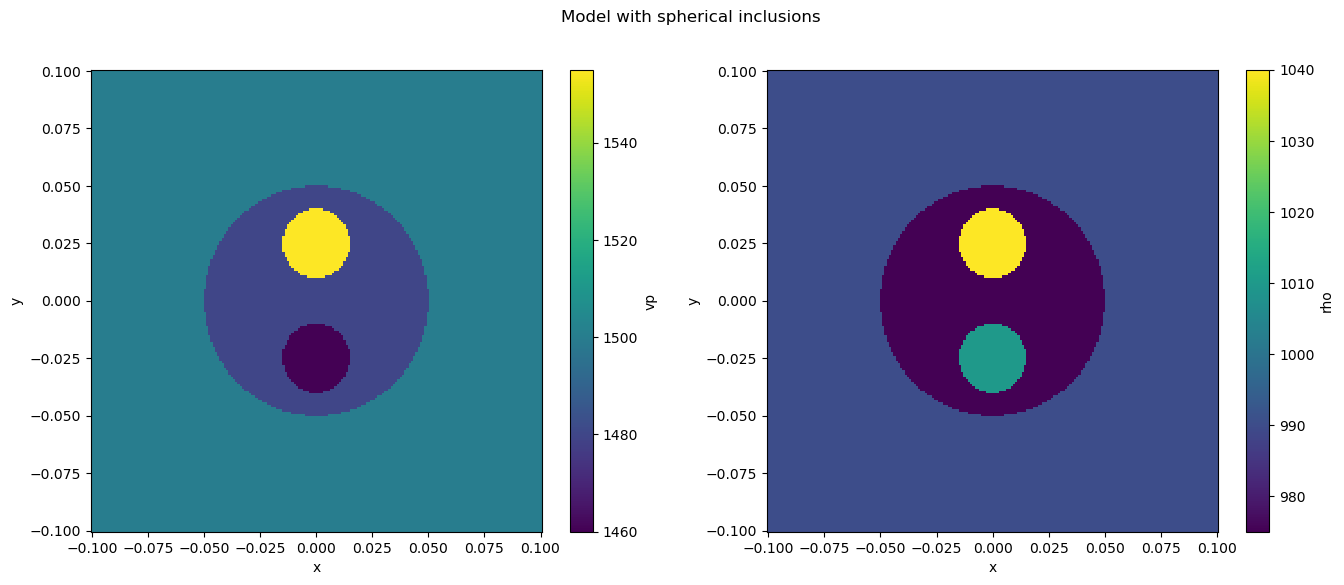

In [12]:
true_model = get_spherical_inclusion()

# Plot the xarray dataset.
plt.figure(figsize=(16, 6))
plt.subplot(121)
true_model.vp.T.plot()
plt.subplot(122)
true_model.rho.T.plot()
plt.suptitle("Model with spherical inclusions")
plt.show()

In [ ]:
# Uncomment the following line to delete a
# potentially existing project for a fresh start
# !rm -rf project
vm = sn.model.volume.cartesian.GenericModel(name="true_model", data=true_model)

p = sn.Project.from_volume_model(
    path="project",
    volume_model=vm,
    load_if_exists=True,
)

Accordion(children=(HTML(value='\n                <head>\n                <style>\n                td {\n     …

[2025-08-22 14:56:37,940] INFO: Loading project from project.
[2025-08-22 14:56:37,992] INFO: This exact entity is already part of the project. Nothing will be done.


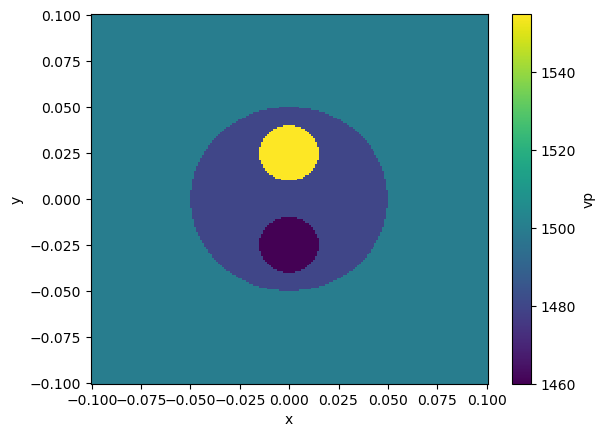

Text(0.5, 0.965, 'Workflow: SH Wave Propagation in Randomly Layered Media')

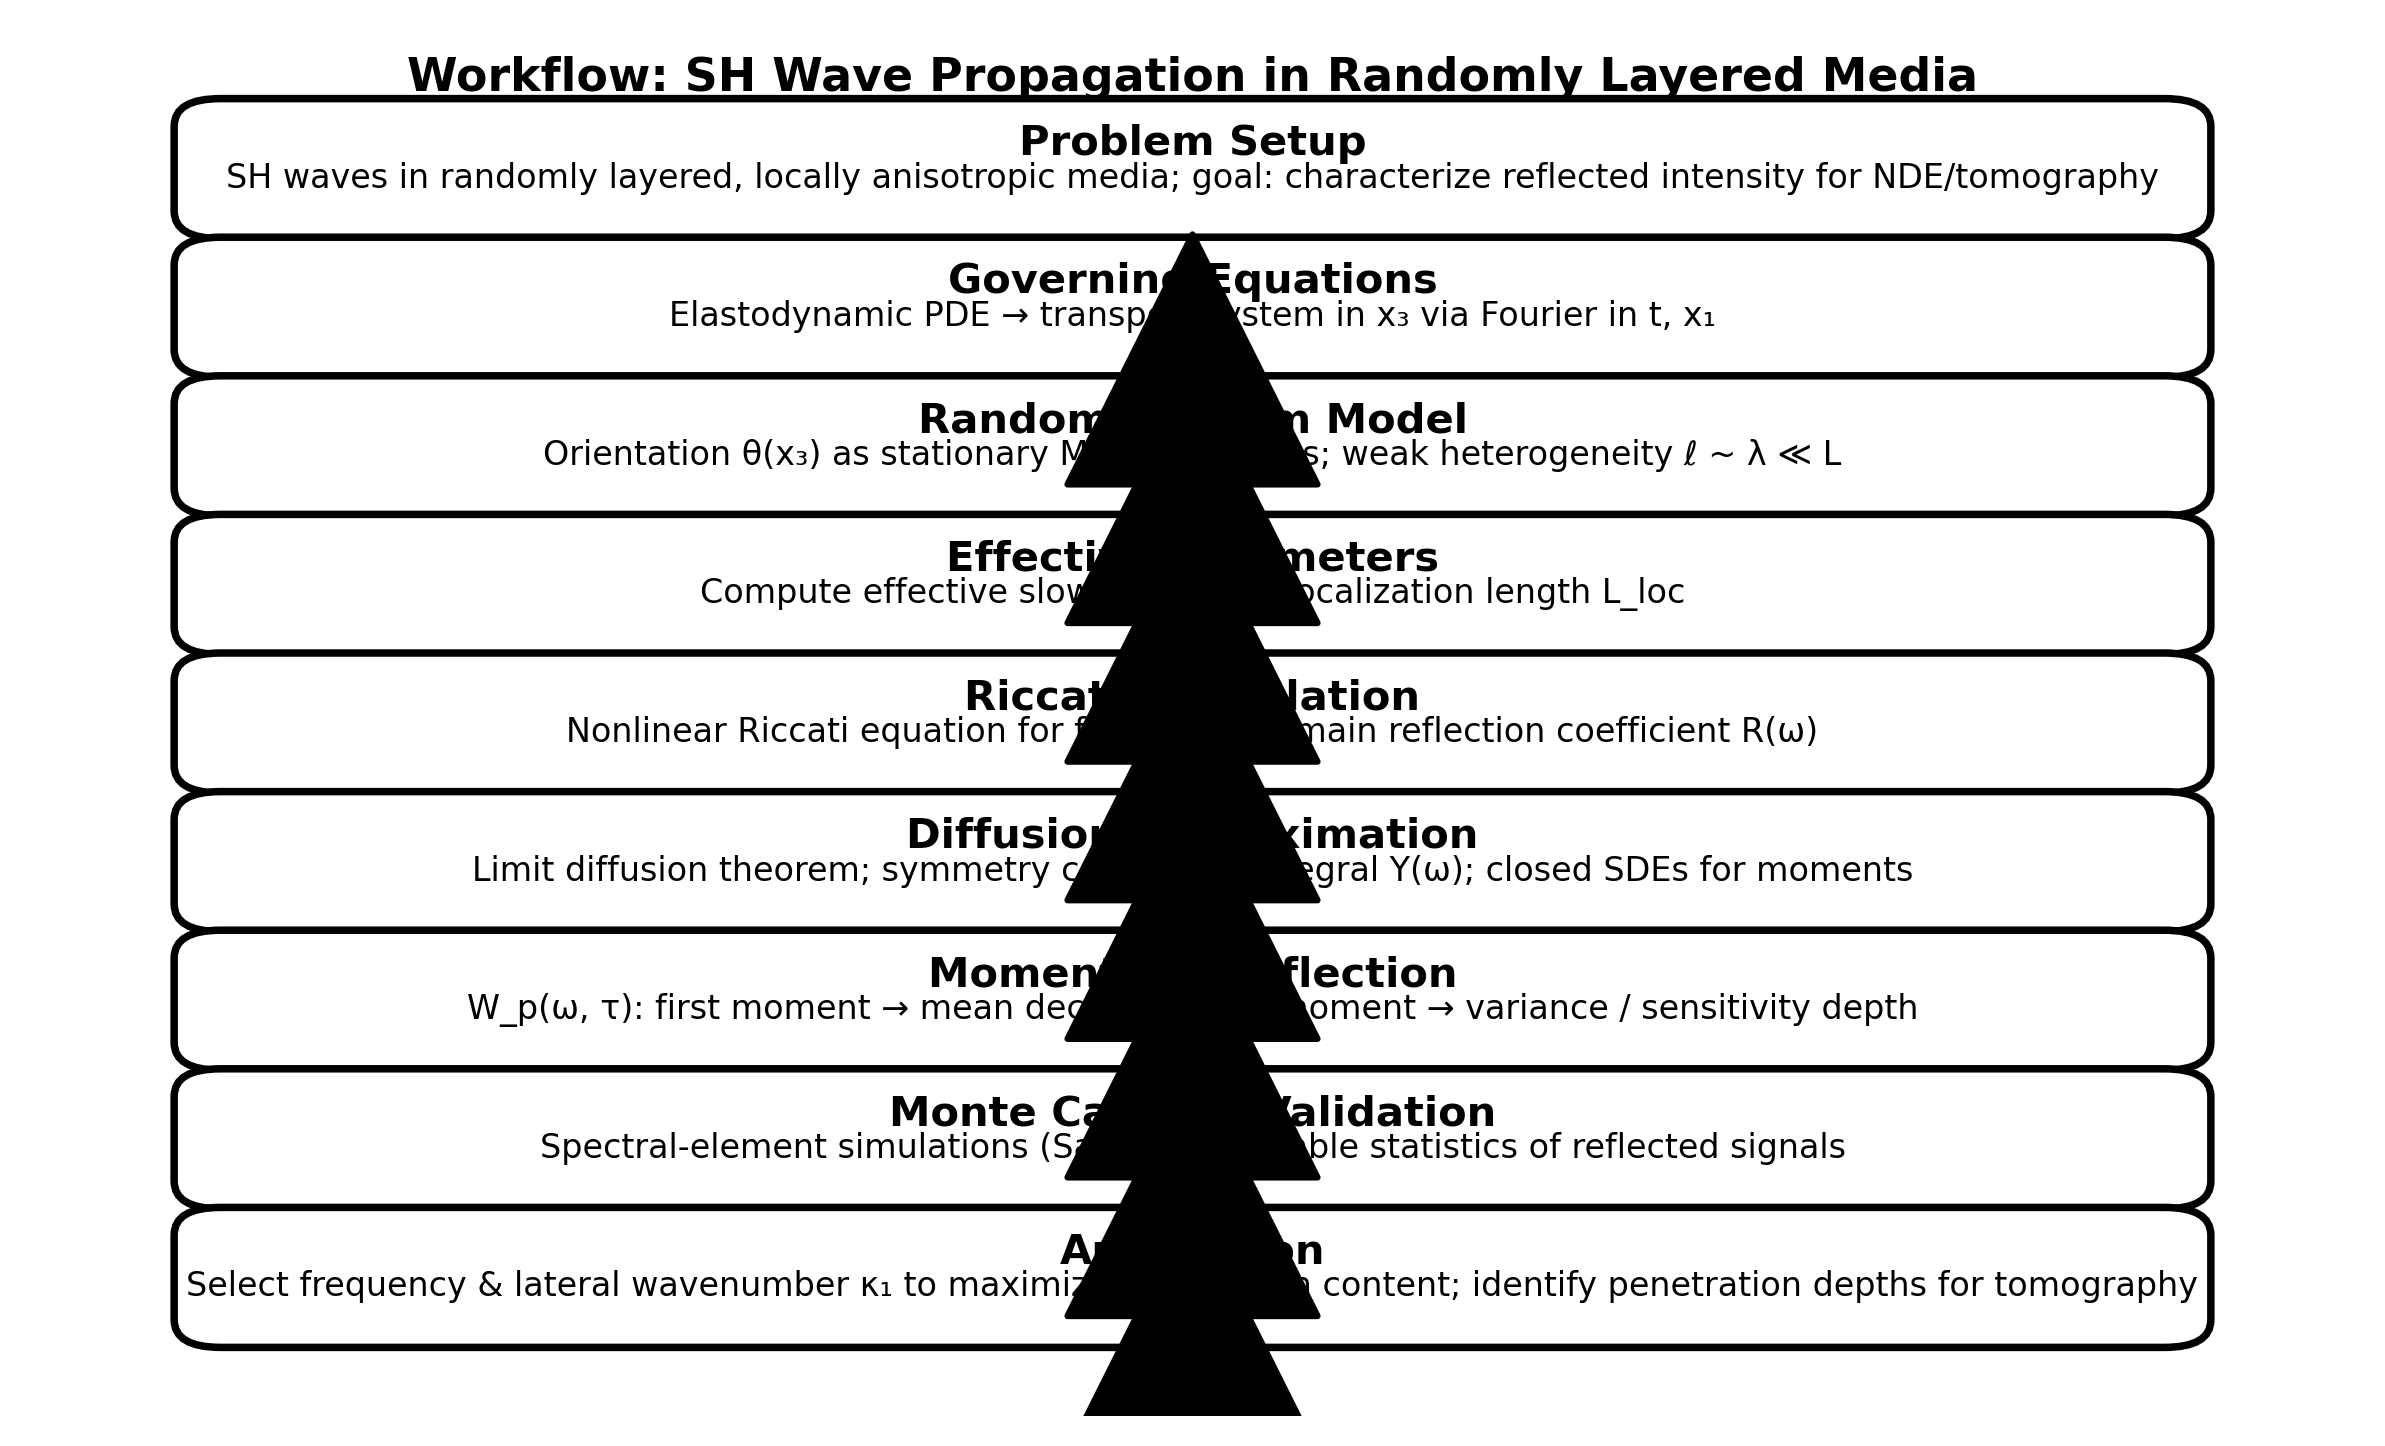

In [1]:
# Create a publication-style schematic flowchart as a static figure (black & white),
# suitable for inclusion in a paper. It will be saved as both PNG and PDF.

import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
from matplotlib.patches import FancyArrowPatch

# Canvas
fig_w, fig_h = 10, 6  # inches
fig = plt.figure(figsize=(fig_w, fig_h), dpi=300)
ax = plt.gca()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Box parameters
box_w = 0.86
box_h = 0.085
x_center = 0.5

y_levels = [
    0.90,  # Problem Setup
    0.80,  # Governing Equations
    0.70,  # Random Medium Model
    0.60,  # Effective Parameters
    0.50,  # Riccati Formulation
    0.40,  # Diffusion Approximation
    0.30,  # Moments of Reflection
    0.20,  # Monte Carlo FE Validation
    0.10,  # Application
]

entries = [
    ("Problem Setup",
     "SH waves in randomly layered, locally anisotropic media; goal: characterize reflected intensity for NDE/tomography"),
    ("Governing Equations",
     "Elastodynamic PDE → transport system in x₃ via Fourier in t, x₁"),
    ("Random Medium Model",
     "Orientation θ(x₃) as stationary Markov process; weak heterogeneity ℓ ~ λ ≪ L"),
    ("Effective Parameters",
     "Compute effective slowness ϕ̄ and localization length L_loc"),
    ("Riccati Formulation",
     "Nonlinear Riccati equation for frequency-domain reflection coefficient R(ω)"),
    ("Diffusion Approximation",
     "Limit diffusion theorem; symmetry correlation integral Υ(ω); closed SDEs for moments"),
    ("Moments of Reflection",
     "W_p(ω, τ): first moment → mean decay; second moment → variance / sensitivity depth"),
    ("Monte Carlo FE Validation",
     "Spectral-element simulations (Salvus); ensemble statistics of reflected signals"),
    ("Application",
     "Select frequency & lateral wavenumber κ₁ to maximize information content; identify penetration depths for tomography"),
]

def draw_box(center_x, center_y, width, height, title, text):
    # Rounded rectangle
    rect = FancyBboxPatch(
        (center_x - width/2, center_y - height/2),
        width, height,
        boxstyle="round,pad=0.008,rounding_size=0.02",
        linewidth=1.8, edgecolor="black", facecolor="white"
    )
    ax.add_patch(rect)
    # Title
    ax.text(center_x, center_y + height*0.21, title, ha='center', va='center',
            fontsize=10, fontweight='bold')
    # Body text
    ax.text(center_x, center_y - height*0.08, text, ha='center', va='center',
            fontsize=8, wrap=True)

# Draw all boxes
for y, (ttl, txt) in zip(y_levels, entries):
    draw_box(x_center, y, box_w, box_h, ttl, txt)

# Draw arrows between boxes
for y_top, y_bot in zip(y_levels[:-1], y_levels[1:]):
    start = (x_center, y_top - box_h/2 - 0.01)
    end   = (x_center, y_bot + box_h/2 + 0.01)
    arr = FancyArrowPatch(
        start, end, arrowstyle='Simple,head_length=6,head_width=6,tail_width=1',
        linewidth=1.5, color="black", mutation_scale=10
    )
    ax.add_patch(arr)

# Title
plt.text(0.5, 0.965, "Workflow: SH Wave Propagation in Randomly Layered Media",
         ha='center', va='center', fontsize=11, fontweight='bold')

# # Save
# png_path = "/mnt/data/workflow_sh_random_flowchart.png"
# pdf_path = "/mnt/data/workflow_sh_random_flowchart.pdf"
# plt.savefig(png_path, bbox_inches="tight")
# plt.savefig(pdf_path, bbox_inches="tight")
# png_path, pdf_path
